## Метод Пиявского

Задача оптимизации формулируется следующим образом: пусть необходимо найти максимум функции (f(x)), которая удовлетворяет условию Липшица на отрезке ([a, b]):

$[ |f(x) - f(y)| \leq L |x - y|, ]$

где L — константа Липшица, $(x, y \in [a, b])$.

Алгоритм
1. Инициализация. Выбрать начальные точки $x_1 = a$ и $x_2 = b$. Вычислить $f(x_1)$ и $f(x_2)$.
2. Итерация. На каждом шаге определяется точка $x_{new}$, в которой потенциально может находиться глобальный максимум.
3. Вычисление значения функции в точке $x_{new}$.
4. Вставка новой точки. Точка (x_{new}) вставляется в список текущих точек, сохраняя упорядоченность.
5. Проверка критерия остановки. Если максимальное изменение между соседними точками меньше заданного порога $\epsilon)$, завершить алгоритм.
6. Повторение шагов 2-5 до выполнения критерия остановки.

Основной идеей метода Пиявского является использование нижней оценки функции с помощью функции Липшица, так что новая точка выбирается в месте, где оценка показывает наибольшее значение

План работы
1. Реализовать функцию поиска глобального экстремума
2. Реализовать функции чтения из файла
3. Оценить результат

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

f = lambda x: np.sin(x) - np.sqrt(x)
interval = [0.1, 40]

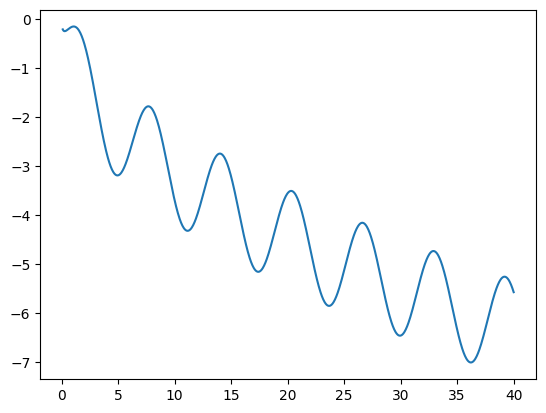

In [14]:
X = np.linspace(interval[0], interval[1], 1000)

plt.plot(X, f(X))
plt.show()

In [15]:
def estimate_L(f, X):
    return 2 * np.max(np.abs(f(X[:-1]) - f(X[1:])) / (X[1] - X[0]))

In [16]:
L = estimate_L(f, X)
L

2.565737805729183

In [17]:
def estimate_lipschitz_constant(f, x_range):
    x_values = np.linspace(x_range[0], x_range[1], 1000)
    gradients = np.abs(np.gradient(f(x_values), x_values))
    return np.max(gradients)

# Пример использования
L = estimate_lipschitz_constant(f, interval)
print("Оценка Липшицевой константы:", L)

Оценка Липшицевой константы: 1.2828655292944333


### Функция поиска экстремума

In [18]:
def find_global_extremum(f, interval, eps, iterations):
    start_time = time.time()
    X = np.linspace(interval[0], interval[1], 1000)
    L = estimate_L(f, X)
    
    #step 0 and 1
    u0 = interval[0]
    u1 = interval[1]
    g0 = f(u0) - L * np.abs(X - u0)
    p0 = g0
    g1 = f(u1) - L * np.abs(X - u1)
    p1 = np.maximum(p0, g1)
    
    p_arr = [p1]
    u_old = u1
    u_arr = [u_old]

    for iter in range(iterations):
        u = X[np.argmin(p_arr[-1])]
        g = f(u) - L * np.abs(X - u)
        
        p = np.maximum(p_arr[-1], g)
        p_arr.append(p)
        u_arr.append(u)
        
        if np.abs(u - u_old) < eps:
            break
        
        u_old = u
    end_time = time.time()
    return u, p_arr, u_arr, iter, end_time - start_time

### Функция отрисовки графика

In [19]:
def draw_plot(iter):
    i = iter - 1
    plt.plot(X, f(X), color='tab:red', label='Initial function')
    plt.plot(X, p_arr[i], color='tab:blue', label='Polylines', alpha=0.6)
    plt.scatter(u, f(u), zorder=3, color='black', s=40, label=f'x={round(u, 4)}')
    plt.title(f'Iteration {i}')
    plt.xlabel('$x$')
    plt.ylabel('f(x)')
    plt.legend()

### Функция чтения из файла

In [20]:
from sympy import symbols, lambdify, sympify


def parse_function(input_str):
    x = symbols('x')
    
    try:
        # Парсим введенную строку в символьное выражение
        expr = sympify(input_str)
        
        # Создаем лямбда-функцию
        f = lambdify(x, expr, 'numpy')
        
        return f

    except Exception as e:
        print(f"Ошибка при парсинге функции: {e}")
        return None

In [21]:
import json

def read_file(name):
    with open(name, 'r') as f:
        data = f.read()

    return parse_input(data)


def parse_input(data):
    data = json.loads(data)
    return parse_function(data['input']), data['interval'], data['epsilon']

### Запуск программы

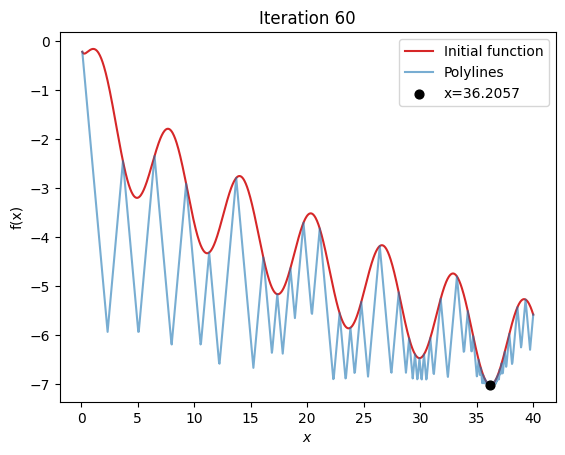

In [22]:
iters = 1000
f, interval, epsilon = read_file('input.json')
u, p_arr, u_arr, iter, work_time = find_global_extremum(f, interval, epsilon, iters)
draw_plot(iter)

In [23]:
work_time

0.0005321502685546875